## 1차 과제 - 고객 유지/이탈 자유 분석
- 주제: 가입 고객 이탈 데이터를 분석하여 기업에 인사이트 제공
- 데이터: Customer Churn Data(train data가 따로 있으나 너무 커서 test data만 사용, 예측 성능 향상을 원한다면 train data 사용해도 무방)
https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv
- 사용 라이브러리: 자유

본 과제는 여러분들의 실력을 확인하고자 출제한 과제로 어떠한 가이드라인도 제공하거나 제약하지 않으며 자유롭게 분석하시면 됩니다.

분석이나 예측 어느 쪽이든 상관없으며 몇가지 조건만 유의하여 주시기 바랍니다.

### 조건
1. 기본적인 분석 과정은 EDA(데이터 탐색) > 전처리 > 분석(예측) 진행 > 결과 해석 으로 진행되지만 약간의 수정 허용
2. EDA 과정에서 최소 2개의 시각화 모형(그래프) 사용
3. 분석 및 예측 시 최소 2개의 모형(모델) 사용
4. 전처리는 자유롭게 진행하며 추가적인 데이터 사용이 필요하다면 허용

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('customer_churn_dataset-testing-master.csv')

In [14]:
## Looking into data
print(data.head())
print(data.info())
#There are different 64,374 kinds of data, 12 columns. I'll focus on "Churn".  

   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0  
<c

In [12]:
#값들 분포도 확인해봤습니다.
data.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


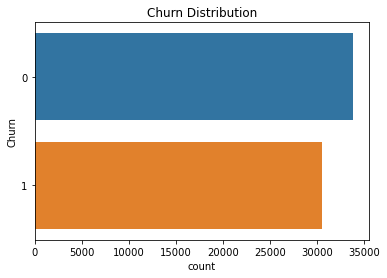

In [19]:
sns.countplot(y= 'Churn', data=data)
plt.title('Churn Distribution')
plt.show()

In [20]:
churn_counts = data['Churn'].value_counts()
print(churn_counts)

0    33881
1    30493
Name: Churn, dtype: int64


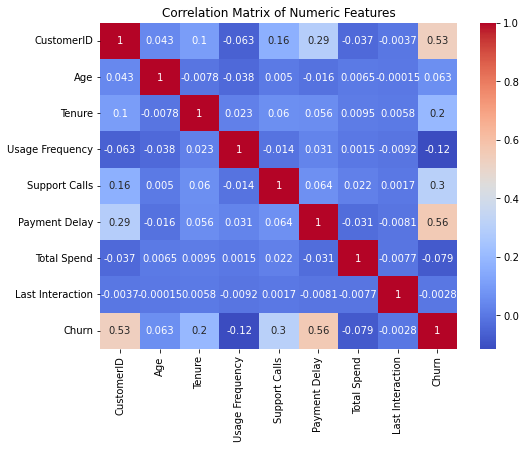

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()
##Apart from Customer ID, This heatmap shows 'Payment Delay' and 'Churn' are HIGHLY related.

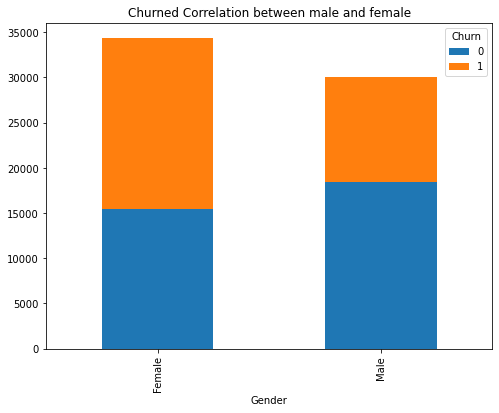

In [35]:
## I have looked into "objects" too
cross_tab = pd.crosstab(data['Gender'], data['Churn'])
cross_tab.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Churned Correlation between male and female')
plt.show()
### It shows women have higher churn rate than men. --> Gender seems to be related.

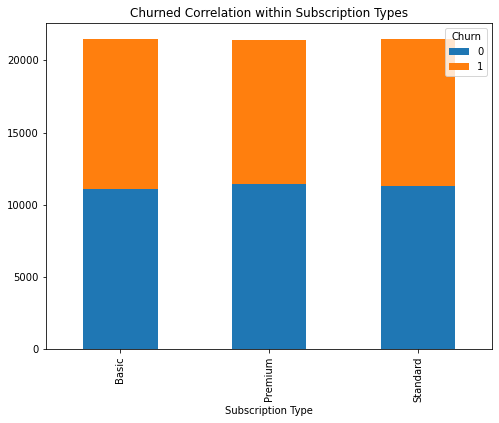

In [36]:
cross_tab = pd.crosstab(data['Subscription Type'], data['Churn'])
cross_tab.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Churned Correlation within Subscription Types')
plt.show()
###Subscription Type doesn't seem to be related.

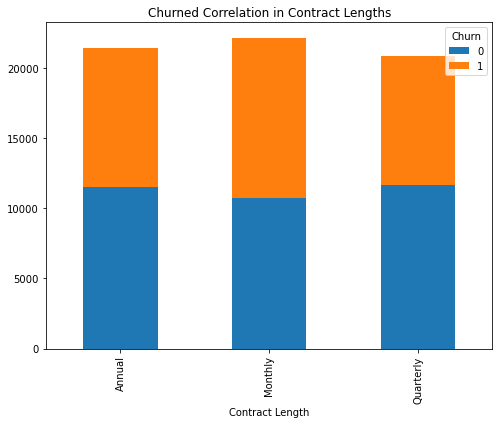

In [37]:
cross_tab = pd.crosstab(data['Contract Length'], data['Churn'])
cross_tab.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Churned Correlation in Contract Lengths')
plt.show()
### It shows people who contract on a month have high churn rate.
### So We gotta focus on Payment Delay, Gender, and Contract Length(Monthly).

In [74]:
###Data preprocessing
##There were no null data
##Let's convert categorical variables into numbers.
label_enc = LabelEncoder()
data['Gender'] = label_enc.fit_transform(data['Gender'])
data['Subscription Type'] = label_enc.fit_transform(data['Subscription Type'])
data['Contract Length'] = label_enc.fit_transform(data['Contract Length'])


In [102]:
##Data dropping
X = data[['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 
        'Payment Delay', 'Subscription Type', 'Contract Length', 
        'Total Spend', 'Last Interaction','Gender']]
y = data['Churn']

In [103]:
##Data scaling and standardisation
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [104]:
##Data separation(Train / Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
y_train= y_train.values.ravel()

In [105]:
###Modeling: logistic regression model (L1 정규화+ 반복 2000번)

logistic_model = LogisticRegression(solver='saga', max_iter=2000, penalty='l1')
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, penalty='l1', solver='saga')

In [106]:
logistic_model.score(X_test, y_test)

0.8277843939315487

In [107]:
##Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)
###Accuracy of Random Forest model's is quite better. Therefore, I'm gonna use RF Model from now on

0.9989644281054212

In [108]:
importances = rf_model.feature_importances_

In [109]:
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

In [110]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)

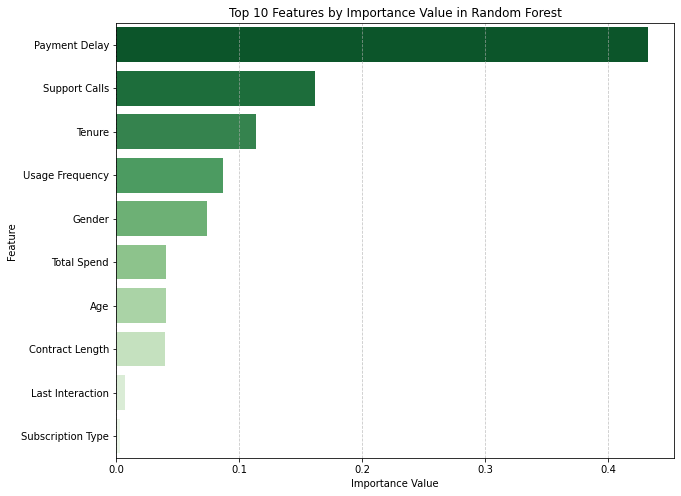

In [112]:
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df.head(10), y='Feature', x='Importance', palette='Greens_r')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.title('Top 10 Features by Importance Value in Random Forest')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
###Payment Delay is the most important factor to expect the value of "Churn"

In [114]:
##Extra: payment delay 값을 기준으로 이탈 비율의 변화
delay_churn = data.groupby('Payment Delay')['Churn'].mean().reset_index()

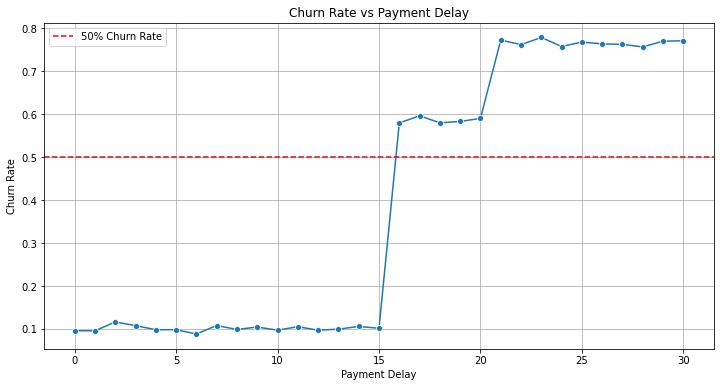

In [115]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=delay_churn, x='Payment Delay', y='Churn', marker='o')
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Churn Rate')
plt.xlabel('Payment Delay')
plt.ylabel('Churn Rate')
plt.title('Churn Rate vs Payment Delay')
plt.grid(True)
plt.legend()
plt.show()
##payment delay가 15가 넘는 순간부터 Churn Rate이 0.5이상으로 급격하게 뛴다.

In [116]:
call_churn = data.groupby('Support Calls')['Churn'].mean().reset_index()

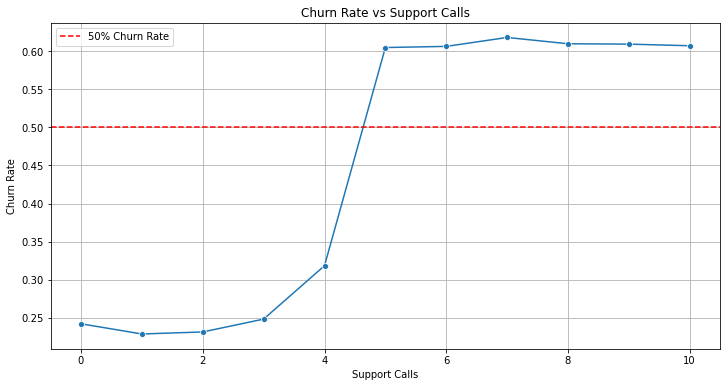

In [117]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=call_churn, x='Support Calls', y='Churn', marker='o')
plt.axhline(y=0.5, color='red', linestyle='--', label='50% Churn Rate')
plt.xlabel('Support Calls')
plt.ylabel('Churn Rate')
plt.title('Churn Rate vs Support Calls')
plt.grid(True)
plt.legend()
plt.show()
##Support Calls 또한 4~5 사이에서 급격한 이탈률 급증을 보인다.

In [126]:
#### Let's look into Gender, and Contract Length(Monthly) that we used to think they were important
### But I think we gotta consider gender and age both, because they are both individual identity.
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 20, 30, 40, 50, 60, 100], labels=['10s', '20s', '30s', '40s', '50s', '60+'])
age_gender_churn = data.groupby(['AgeGroup', 'Gender'])['Churn'].mean().reset_index()

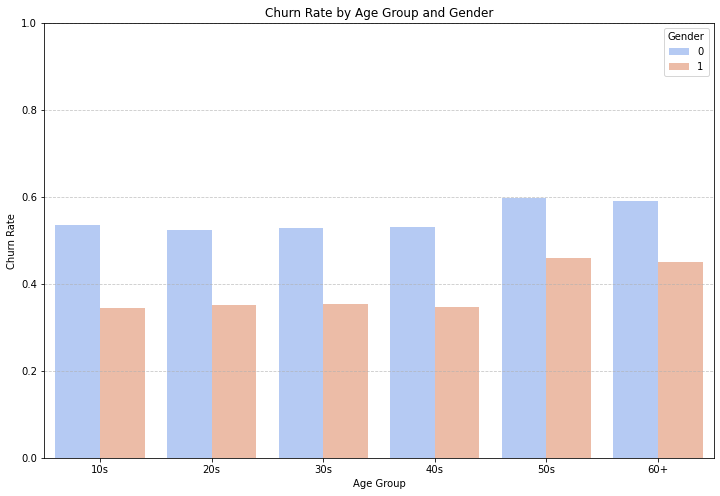

In [127]:
plt.figure(figsize=(12, 8))
sns.barplot(data=age_gender_churn, x='AgeGroup', y='Churn', hue='Gender', palette='coolwarm')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age Group and Gender')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
##여성이 통상적으로 남성보다 이탈률이 높고, 5~60대가 젊은 층보다 조금 더 높긴 하지만 dramatic한 차이는 없다.